In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ase import units
import glob
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/apdft-ofdft-cpmd/')
import profess_io as pio
import analyse_MD as aMD

In [2]:
def sort_dat_files(list_of_files):
    sorted_index = []
    for i in list_of_files:
        sorted_index.append((float(i.split('.')[-2]), i))
    sorted_index.sort(key=lambda tup: tup[0])  # sorts in place
    data_sorted = []
    for item in sorted_index:
        data_sorted.append(item[1])
    return(data_sorted)

In [26]:
out_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/Si8_hc_NVE_ref/nve_Si8.out'
pdt = '/home/misa/projects/APDFT-CPMD/data/BOMD/NVE_trouble/Si8_hc_dt/nve_Si8.out'
ptol = '/home/misa/projects/APDFT-CPMD/data/BOMD/NVE_trouble/Si8_hc_tol/nve_Si8.out'
# pdt_tol = '/home/misa/projects/APDFT-CPMD/data/BOMD/NVE_trouble/Si8_hc_dt_tol/nve_Si8.out'
out_restart = '/home/misa/projects/APDFT-CPMD/data/BOMD/NVE_trouble/Si8_hc_restart/nve_Si8.out'

epot = []
ekin = []
etot = []
for p in [out_file, pdt, ptol, out_restart]:
    epot_tmp = np.array(pio.parse_out_file(p, 'NVE Potential energy'))
    ekin_tmp = np.array(pio.parse_out_file(p, 'NVE Kinetic energy'))
    etot_tmp = epot_tmp + ekin_tmp
    
    epot.append(epot_tmp)
    ekin.append(ekin_tmp)
    etot.append(etot_tmp)

# '/home/misa/projects/APDFT-CPMD/data/BOMD/NVE_trouble/Si8_hc_restart/nve_Si8.out'
time = []
for i, dt in enumerate([0.1, 0.01, 0.01, 0.1]):
    time.append(np.arange(0, len(epot[i])*dt, dt))

In [14]:
for v in epot:
    print(len(v))

77815
5000
5000


In [43]:
units.Ha

27.211386024367243

In [46]:
(etot[1][-1]-etot[1][0])*units.Ha/50

-0.0006294231226505641

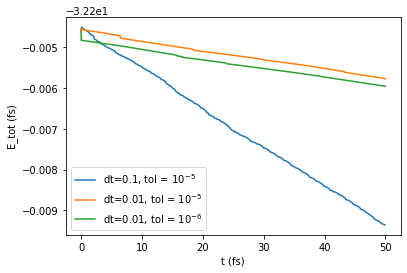

In [37]:
fig, ax = plt.subplots(1,1)
labels = [r'dt=0.1, tol = $10^{-5}$', 'dt=0.01, tol = $10^{-5}$', 'dt=0.1, tol = $10^{-6}$', 'dt=0.01, tol = $10^{-6}$']
ax.plot(time[0][:500], etot[0][:500], label=r'dt=0.1, tol = $10^{-5}$')
ax.plot(time[1][:5000],etot[1][:5000], label='dt=0.01, tol = $10^{-5}$')
ax.plot(time[2][:5000], etot[2][:5000], label='dt=0.01, tol = $10^{-6}$')
# ax.plot(time[3][:500], etot[3][:500], label='restart')

ax.set_xlabel('t (fs)')
ax.set_ylabel('E_tot (fs)')

# for t, v, l in zip(time, epot, labels):
#     ax.plot(t,v, label = l)
ax.legend()

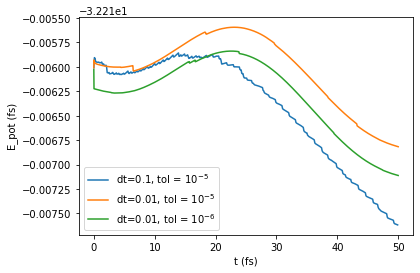

In [36]:
fig, ax = plt.subplots(1,1)
labels = [r'dt=0.1, tol = $10^{-5}$', 'dt=0.01, tol = $10^{-5}$', 'dt=0.1, tol = $10^{-6}$', 'dt=0.01, tol = $10^{-6}$']
ax.plot(time[0][:500], epot[0][:500], label=r'dt=0.1, tol = $10^{-5}$')
ax.plot(time[1][:5000], epot[1][:5000], label='dt=0.01, tol = $10^{-5}$')
ax.plot(time[2][:5000], epot[2][:5000], label='dt=0.01, tol = $10^{-6}$')
# ax.plot(time[3][:500], epot[3][:500], label='restart')

ax.set_xlabel('t (fs)')
ax.set_ylabel('E_pot (fs)')
# for t, v, l in zip(time, epot, labels):
#     ax.plot(t,v, label = l)
ax.legend()

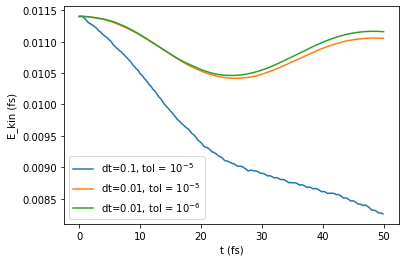

In [35]:
fig, ax = plt.subplots(1,1)
labels = [r'dt=0.1, tol = $10^{-5}$', 'dt=0.01, tol = $10^{-5}$', 'dt=0.1, tol = $10^{-6}$', 'dt=0.01, tol = $10^{-6}$']
ax.plot(time[0][:500], ekin[0][:500], label=r'dt=0.1, tol = $10^{-5}$')
ax.plot(time[1][:5000],ekin[1][:5000], label='dt=0.01, tol = $10^{-5}$')
ax.plot(time[2][:5000], ekin[2][:5000], label='dt=0.01, tol = $10^{-6}$')
# ax.plot(time[3][:500], ekin[3][:500], label='restart')

ax.set_xlabel('t (fs)')
ax.set_ylabel('E_kin (fs)')
# for t, v, l in zip(time, epot, labels):
#     ax.plot(t,v, label = l)
ax.legend()

In [14]:
out_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/Si8_hc_NVE_ref/nve_Si8.out'
t = pio.parse_out_file(out_file, 'nve temperature')
epot = pio.parse_out_file(out_file, 'NVE Potential energy')
ekin = pio.parse_out_file(out_file, 'NVE Kinetic energy')
etot = np.array(epot)+np.array(ekin)

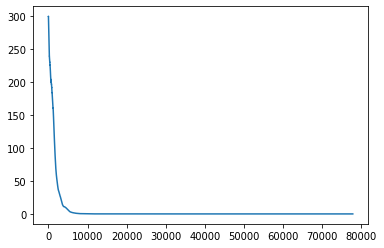

In [17]:
plt.plot(t)

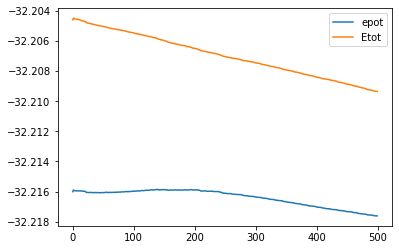

In [22]:
plt.plot(epot[:500], label = 'epot')
plt.plot(etot[:500], label = 'Etot')
plt.legend()

In [23]:
etot[0]

-32.204609448110006

In [ ]:
-32.2059654109723
0.00415431008339785

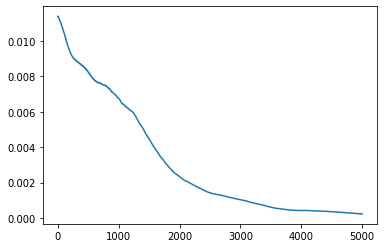

In [6]:
plt.plot(ekin[:5000])

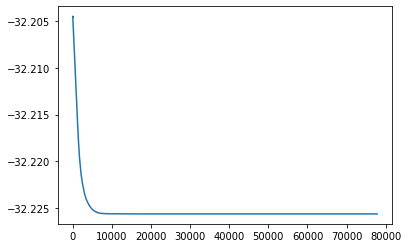

In [13]:
plt.plot()

array([-32.20460945, -32.20450254, -32.20451096, ..., -32.22560868,
       -32.22560868, -32.22560868])

In [7]:
ion_data=glob.glob('/home/misa/projects/APDFT-CPMD/data/BOMD/Si8_hc_NVE_ref/ion.*.dat')
ion_data = sort_dat_files(ion_data)
positions = aMD.get_positions2(ion_data)

In [25]:
50e-15/1e-17

5000.0

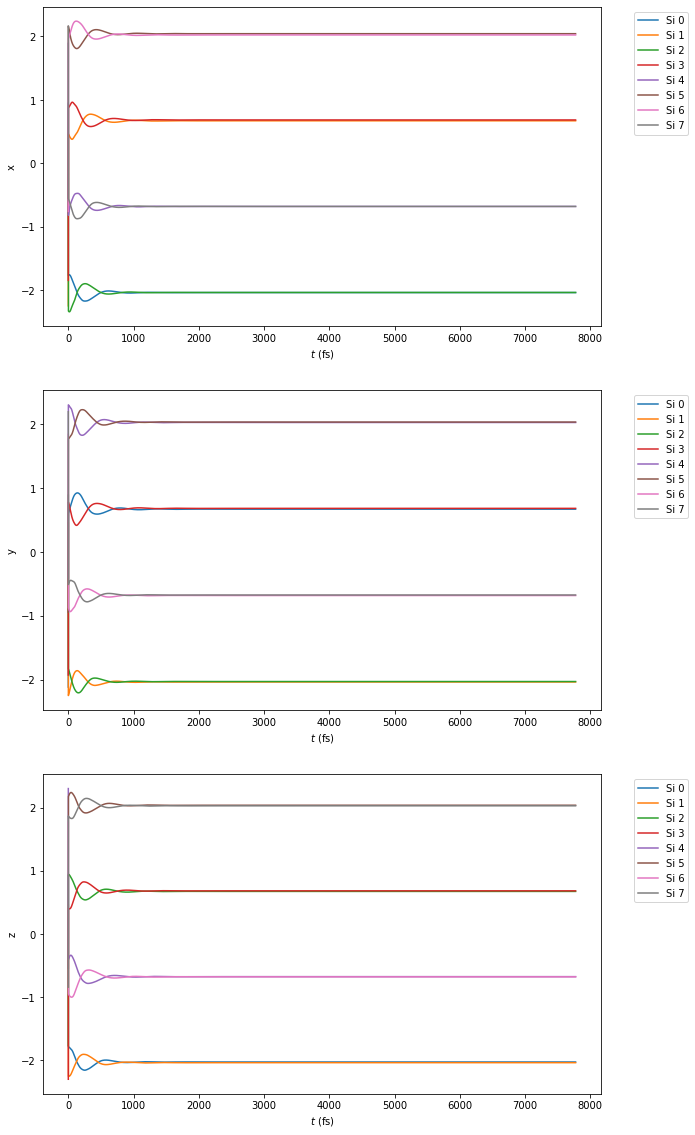

In [13]:
plt.rcParams['figure.figsize'] = [10,20]
fig, ax = plt.subplots(3,1)
for i in range(3):
    aMD.plot_coordinate(ax, i, positions, i)